<h1 style="text-align: center;"> Introduction to Plotting with Pandas and Matplotlib </h1>

<br />

* We have used the matplotlib api directly to write low level code to plot till now, but luckily pandas has a very good implementation of plotting based on the matplotlib API

<br />

* We can mix and match the pandas plotting api along with matplotlib to produce complex polts

<br />

* Let us take a look at the Pandas plotting api below


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plotting in Pandas

Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

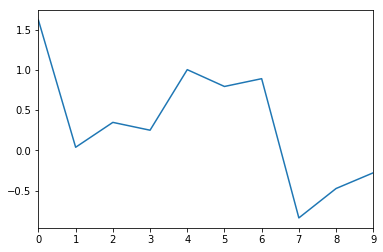

In [13]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

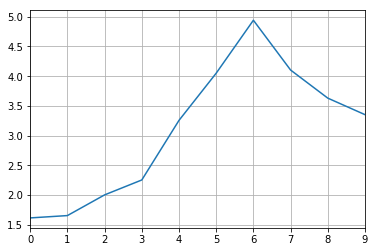

In [15]:
normals.cumsum().plot(grid=True)

Similarly, for a DataFrame:

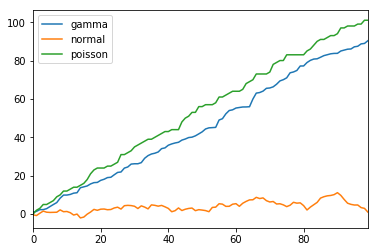

In [16]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

### As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4E88D2048>,
      dtype=object)

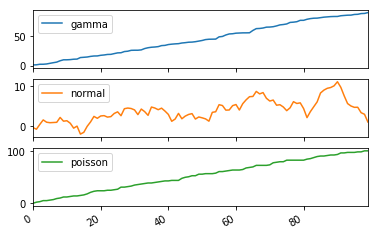

In [17]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

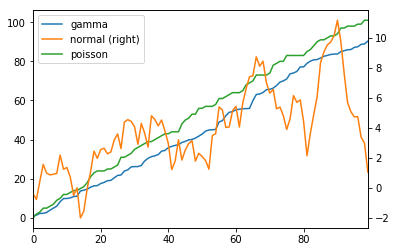

In [18]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

Text(0,0.5,'cumulative sum')

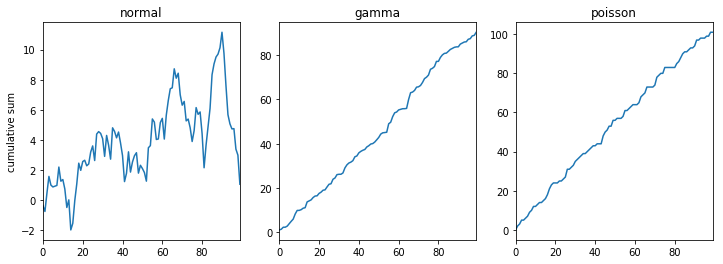

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [20]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


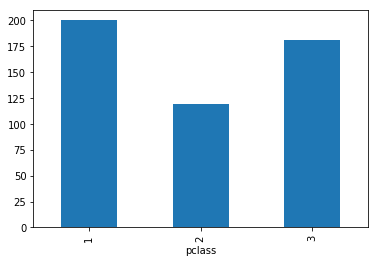

In [23]:
titanic.groupby('pclass')['survived'].sum().plot(kind='bar')

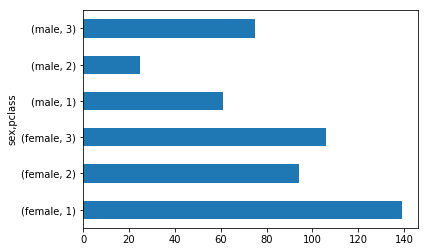

In [24]:
titanic.groupby(['sex','pclass'])['survived'].sum().plot(kind='barh')

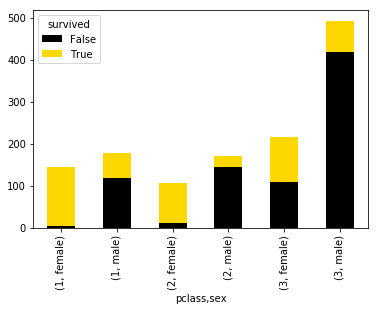

In [27]:
death_counts = pd.crosstab([titanic['pclass'], titanic['sex']], titanic['survived'].astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

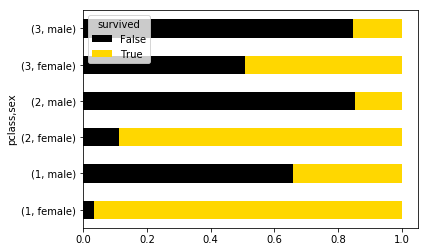

In [29]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

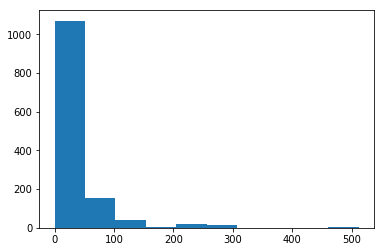

In [31]:
titanic['fare'].hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

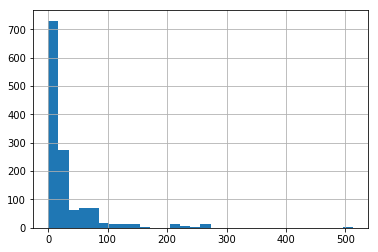

In [32]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

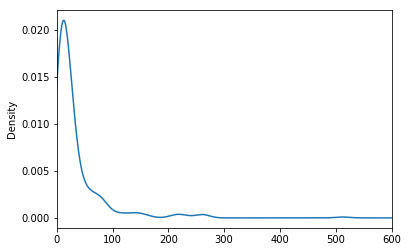

In [35]:
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

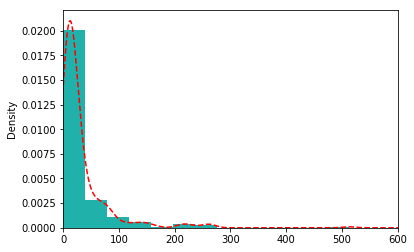

In [41]:
titanic['fare'].hist(bins=13, normed=True, color='lightseagreen')
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

C:\Users\yoges\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


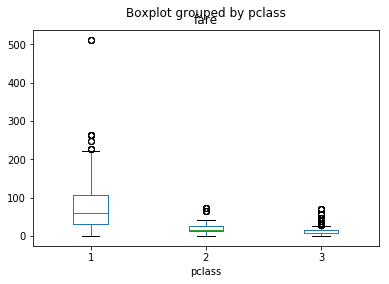

In [42]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

## Scatterplots

To look at how Pandas does scatterplots, let's reload the baseball sample dataset.

In [44]:
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

(0, 200)

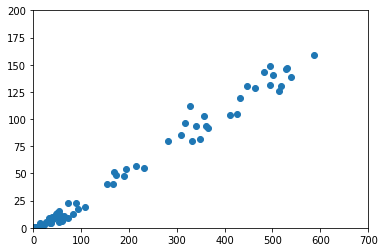

In [55]:
plt.scatter(baseball['ab'], baseball['h'])

plt.xlim(0, 700)

plt.ylim(0, 200)

(0, 200)

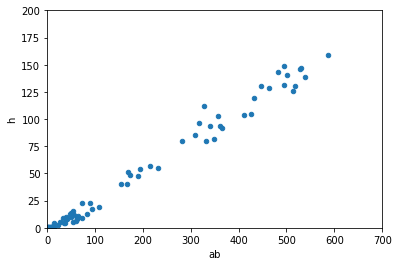

In [61]:
baseball.plot.scatter(x = 'ab', y = 'h')

plt.xlim(0, 700)

plt.ylim(0, 200)

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

(0, 200)

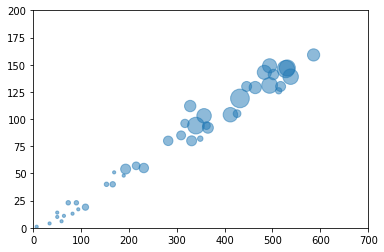

In [62]:
plt.scatter(baseball['ab'], baseball['h'], s=baseball['hr']*10, alpha=0.5)

plt.xlim(0, 700)

plt.ylim(0, 200)

(0, 200)

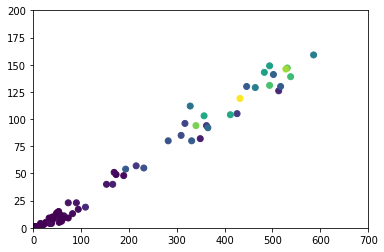

In [63]:
plt.scatter(baseball['ab'], baseball['h'], c = baseball['hr'])
plt.xlim(0, 700)
plt.ylim(0, 200)

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

C:\Users\yoges\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


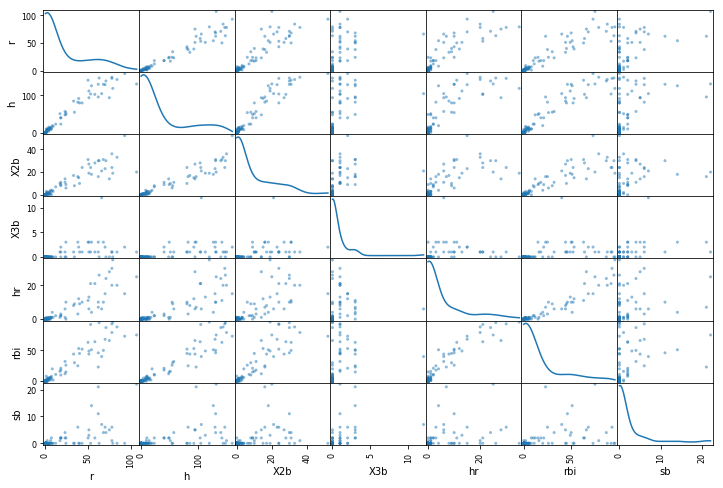

In [64]:
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')